# The development in productivity and hourly wages in Denmark across industries and years.

## Introduction

The development in productivity is the underlying condition for natural increase in wages, and therefore a substantial contributor the overall wealth in society. This statement is something the _The Productivity Commision_ and organizations from different sites of the political spectrum (ex. _Danish Metal Workers Union_ and _Cepos_) agrees with, even though the calculations of this is used to assist different claims. 

The trends in hourly wage and hourly productivety is said to follow each other in the long run. If the increasement in wage is bigger than the increasements in productivity, it will be too expensive for companies to produce, and this will lead to a lower production and lower employment. Rising unemployment will lead to a lower increase in overall earnings, and will at last lead to a better competitiveness and therefore productivity. 

(_If wages are persistently lagging behind productivity, workers do not receive their fair share of the produced wealth. This is not only deeply unjust but also economically detrimental, as growth remains behind its potential. Labour income remains the main source of income for households and private consumption makes up the largest part of aggregate demand._) - Bela Galgoczi 

In this assignment we investigate the relationship between productivity and hourly wage in Denmark. We want to investigate the relationship, when we compare different industries to each other and the total trends. Some industries may  naturally have a close relationship, where other industries may be have a bigger deviation between wage and productivity


We meausure productivity and hourly wage as shown in the two following equations:  



given by

\\[
\begin{eqnarray*}
Productivity_{ij} = \frac{Gross\:value\:added_{ij}}{Hours\:worked_{ij}}
\\
\\
Hourly\: wage_{ij} = \frac{Compensation\:of\:employees_{ij}}{Hours\:worked\:by\:employees_{ij}}
\end{eqnarray*}
\\]


where ${i}$ denotes years and ${j}$ denotes industries.

Moving on, we start by importing all the modules, we need for this notebook.

## Data managemnet

**Imports of packages:** We import packages to calculate and manipulate data (_numpy_ and _pandas_) and pacakages to plot our results (_matplot_ and _seaborn_). Lastly we import _pydst_ which enables the use of _Statistics Denmark_ from where we get our relevant data.

In [94]:
#Importer vigtige pakker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web

import datetime
import pydst
dst = pydst.Dst(lang='en')

From statistics Denmark we load data which contains _the Gross value added, the compensation of employees, the hours worked in total_ and _the hours worked by the employees_ in the different industries. More specifically we load two datasets; 

1. NABP10: A dataset containing the gross value added and compensation of employees 
2. NABB10: A dataset containing the hours worked by employees and hours worked in total

We need to merge the two datasets to one, but first we have to check the specific datasets, their dimensions, renaming, convert strings to floats etc.


**Imports of data:**

In [95]:
# a. gettign an orientation in data
dst.get_variables('NABP10') # command to se 'id'
dst.get_variables('NABP10').iloc[0]['values'] # command to se 'values' in 'TRANSAKT'

# b.  loading data 
gva10 = dst.get_data(table_id = 'NABP10', variables={'TRANSAKT':['B1GD','D1D'],'BRANCHE':['*'], 'PRISENHED':['V'], 'TID':['*']})
emp10 = dst.get_data(table_id = 'NABB10', variables={'SOCIO':['EMPH_DC','SALH_DC'],'BRANCHE':['*'], 'TID':['*']})
    
# c. Checking the dimensions  
print(f'Industries in gva10 = {len(gva10.BRANCHE.unique())}')
print(f'Industries in emp10  = {len(emp10.BRANCHE.unique())}')

print(f'Years in gva10 = {len(gva10.TID.unique())}')
print(f'Years in emp10  = {len(emp10.TID.unique())}')

Industries in gva10 = 15
Industries in emp10  = 15
Years in gva10 = 53
Years in emp10  = 53


From table "NABP10" we do only read data in nominal prices, which is due to the fact that "Compensation of employees" is not given in chained prices. 

**Renaming variables:**

In [96]:
# b. define dictionaries to rename variables
columns_dict = {}
columns_dict['TRANSAKT']  = 'variable'
columns_dict['BRANCHE']   = 'industry'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID']       = 'year'
columns_dict['INDHOLD']   = 'value'
columns_dict['SOCIO']     = 'employment'

var_dict = {} # var is for variable
var_dict['B.1g Gross value added']                   = 'GVA'
var_dict['D.1 Compensation of employees']            = 'ComEmp'
var_dict['Hours worked (1,000 hours)']               = 'Hours_TOT'
var_dict['Hours worked for employees (1,000 hours)'] = 'Hours_Emp'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices']              = 'nominal'

industry_dict = {}
industry_dict['A Agriculture, forestry and fishing']                                 = 'Agriculture, forestry and fishing'
industry_dict['B Mining and quarrying']                                              = 'Mining and quarrying'
industry_dict['C Manufacturing']                                                     = 'Manufacturing'
industry_dict['D_E Utility services']                                                = 'Utility services' 
industry_dict['F Construction']                                                      = 'Construction'
industry_dict['G_I Trade and transport etc.']                                        = 'Trade and transport etc.'
industry_dict['J Information and communication']                                     = 'Information and communication'
industry_dict['K Financial and insurance']                                           = 'Financial and insurance'
industry_dict['LA Real estate activities and renting of non-residential buildings']  = 'Real estate activities and renting of non-residential buildings'
industry_dict['LB Dwellings']                                                        = 'Dwellings'
industry_dict['M_N Other business services']                                         = 'Other business services'
industry_dict['O_Q Public administration, education and health']                     = 'Public administration, education and health'
industry_dict['R_S Arts, entertainment and other services']                          = 'Arts, entertainment and other services'

# b. renaming
gva10.rename(columns=columns_dict,inplace=True)
emp10.rename(columns=columns_dict,inplace=True)

for key,value in var_dict.items():
    gva10.variable.replace(key,value, inplace=True)
    emp10.employment.replace(key,value, inplace=True)

for key,value in industry_dict.items():
    gva10.industry.replace(key,value, inplace=True)
    emp10.industry.replace(key,value, inplace=True)

for key,value in unit_dict.items():
    gva10.unit.replace(key,value, inplace=True)

# c. redefine value from 'str' to 'float'
emp10.value = emp10.value.astype('float')
gva10['value'] = gva10['value'].apply(pd.to_numeric, errors='coerce')

emp10.head()

,employment,industry,year,value
0,Hours_TOT,Total,1966,4604383.0
1,Hours_TOT,"Agriculture, forestry and fishing",1966,663692.0
2,Hours_TOT,Mining and quarrying,1966,7945.0
3,Hours_TOT,Manufacturing,1966,1100466.0
4,Hours_TOT,Utility services,1966,29333.0


**Split:**

If we merge our dataset, we will get a long dataset in which our values of be in rows, and we would like to have them in columns. We are aware of the fact that, there maybe a operation converting a dataset from long to wide. But due to the lack of skills at the given moment, we do it the simple way. We split our two datasets into four, and merge our relevant values together.

In [97]:
# Split dataframe emp10 in two - hours total and hours for employees.
H_TOT = emp10.loc[emp10.employment == ('Hours_TOT')]
H_TOT.rename(columns = {'value':'H_TOT'}, inplace=True)

H_Emp = emp10.loc[emp10.employment == ('Hours_Emp')]
H_Emp.rename(columns = {'value':'H_EMP'}, inplace=True)

# Split dataframe gva10 in two - GVA and compensation for employees 
GVA = gva10.loc[gva10.variable == ('GVA')]
GVA.rename(columns = {'value':'GVA'}, inplace=True)

ComEmp = gva10.loc[gva10.variable == ('ComEmp')]
ComEmp.rename(columns = {'value':'ComEmp'}, inplace=True)
GVA.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,variable,industry,unit,year,GVA
0,GVA,Total,nominal,1982,438077
1,GVA,"Agriculture, forestry and fishing",nominal,1982,23420
2,GVA,Mining and quarrying,nominal,1982,3871
3,GVA,Manufacturing,nominal,1982,76773
4,GVA,Utility services,nominal,1982,9757


In [98]:
# dropper 'employment' and 'variable'
H_TOT.drop(columns=['employment'], inplace = True)
H_Emp.drop(columns=['employment'], inplace = True)
GVA.drop(columns=['variable'], inplace = True)
ComEmp.drop(columns=['variable'], inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


**Merge:**

Now we merge our data, sorting on _year_ and _industry_. This way we can calculate the productivity and hourly wage, in a way where we can compare the relationship over time in the different industries.

In [99]:
# c. merged data
merged = pd.merge(GVA,ComEmp,how='left',on=['year','industry'])
merged1 = pd.merge(merged,H_TOT,how='left',on=['year','industry'])
df = pd.merge(merged1,H_Emp,how='left',on=['year','industry'])
df.drop(columns=['unit_y'], inplace = True)

df.GVA = df.GVA.astype('float')
df.ComEmp = df.ComEmp.astype('float')
df

df['Productivity'] = df.GVA / df.H_TOT*1000
df['Hour_wage'] = df.ComEmp / df.H_EMP*1000

# ?. Checking the dimensions the 
print(f'Years in main dataset "df_index" = {len(df.year.unique())}')
print(f'Industries in main dataset "df_index" = {len(df.industry.unique())}')  

df.head()

Years in main dataset "df_index" = 53
Industries in main dataset "df_index" = 15


,industry,unit_x,year,GVA,ComEmp,H_TOT,H_EMP,Productivity,Hour_wage
0,Total,nominal,1982,438077.0,263929.0,3861797.0,3284732.0,113.438640,80.350239
1,"Agriculture, forestry and fishing",nominal,1982,23420.0,3807.0,333573.0,101920.0,70.209519,37.352826
2,Mining and quarrying,nominal,1982,3871.0,900.0,9130.0,8663.0,423.986857,103.890107
3,Manufacturing,nominal,1982,76773.0,50788.0,688864.0,651143.0,111.448704,77.998228
4,Utility services,nominal,1982,9757.0,2774.0,29954.0,29453.0,325.732790,94.183954


**Index:**

We see that the values of the industries is very different in hourly wage and productivity. This makes sense since the wage-level and productivety in the industries differ. Since we want to compare the relationship in industries over time - therefor we normalize the values.

In [102]:
# a. Create a copy
df_index = df.copy()
df_index.sort_values(['industry','year'], inplace=True)

# b. Normalizing by 2010 
df_index['Pro_index'] = df_index.groupby(['industry'])['Productivity'].transform(lambda x: x/x.iloc[44]*100)
df_index['H_index'] = df_index.groupby(['industry'])['Hour_wage'].transform(lambda x: x/x.iloc[44]*100)

# c. Creat a diff-variable, which takes the different between the productivity and the hourly wage
df_index['Diff'] = df_index['Pro_index'] - df_index['H_index']
    
df_index.tail(10)

,industry,unit_x,year,GVA,ComEmp,H_TOT,H_EMP,Productivity,Hour_wage,Pro_index,H_index,Diff
124,Utility services,nominal,2009,34713.0,10565.0,38951.0,38290.0,891.196632,275.920606,77.421619,97.120426,-19.698807
154,Utility services,nominal,2010,41459.0,10041.0,36017.0,35343.0,1151.095316,284.101519,100.000000,100.000000,0.000000
169,Utility services,nominal,2011,39893.0,9966.0,35296.0,34541.0,1130.241387,288.526678,98.188340,101.557598,-3.369257
214,Utility services,nominal,2012,38690.0,10324.0,35595.0,34875.0,1086.950414,296.028674,94.427490,104.198202,-9.770712
394,Utility services,nominal,2013,36791.0,9867.0,33335.0,32501.0,1103.674816,303.590659,95.880402,106.859921,-10.979519
409,Utility services,nominal,2014,39019.0,10528.0,34779.0,33927.0,1121.912648,310.313320,97.464791,109.226209,-11.761418
259,Utility services,nominal,2015,43375.0,10426.0,33948.0,32429.0,1277.689407,321.502359,110.997707,113.164604,-2.166897
334,Utility services,nominal,2016,44482.0,11032.0,35296.0,34256.0,1260.256120,322.045773,109.483212,113.355878,-3.872667
349,Utility services,nominal,2017,43700.0,10677.0,35291.0,34382.0,1238.276048,310.540399,107.573720,109.306138,-1.732418
784,Utility services,nominal,2018,44995.0,10840.0,34900.0,33979.0,1289.255014,319.020572,112.002455,112.291047,-0.288592


## Plots

....

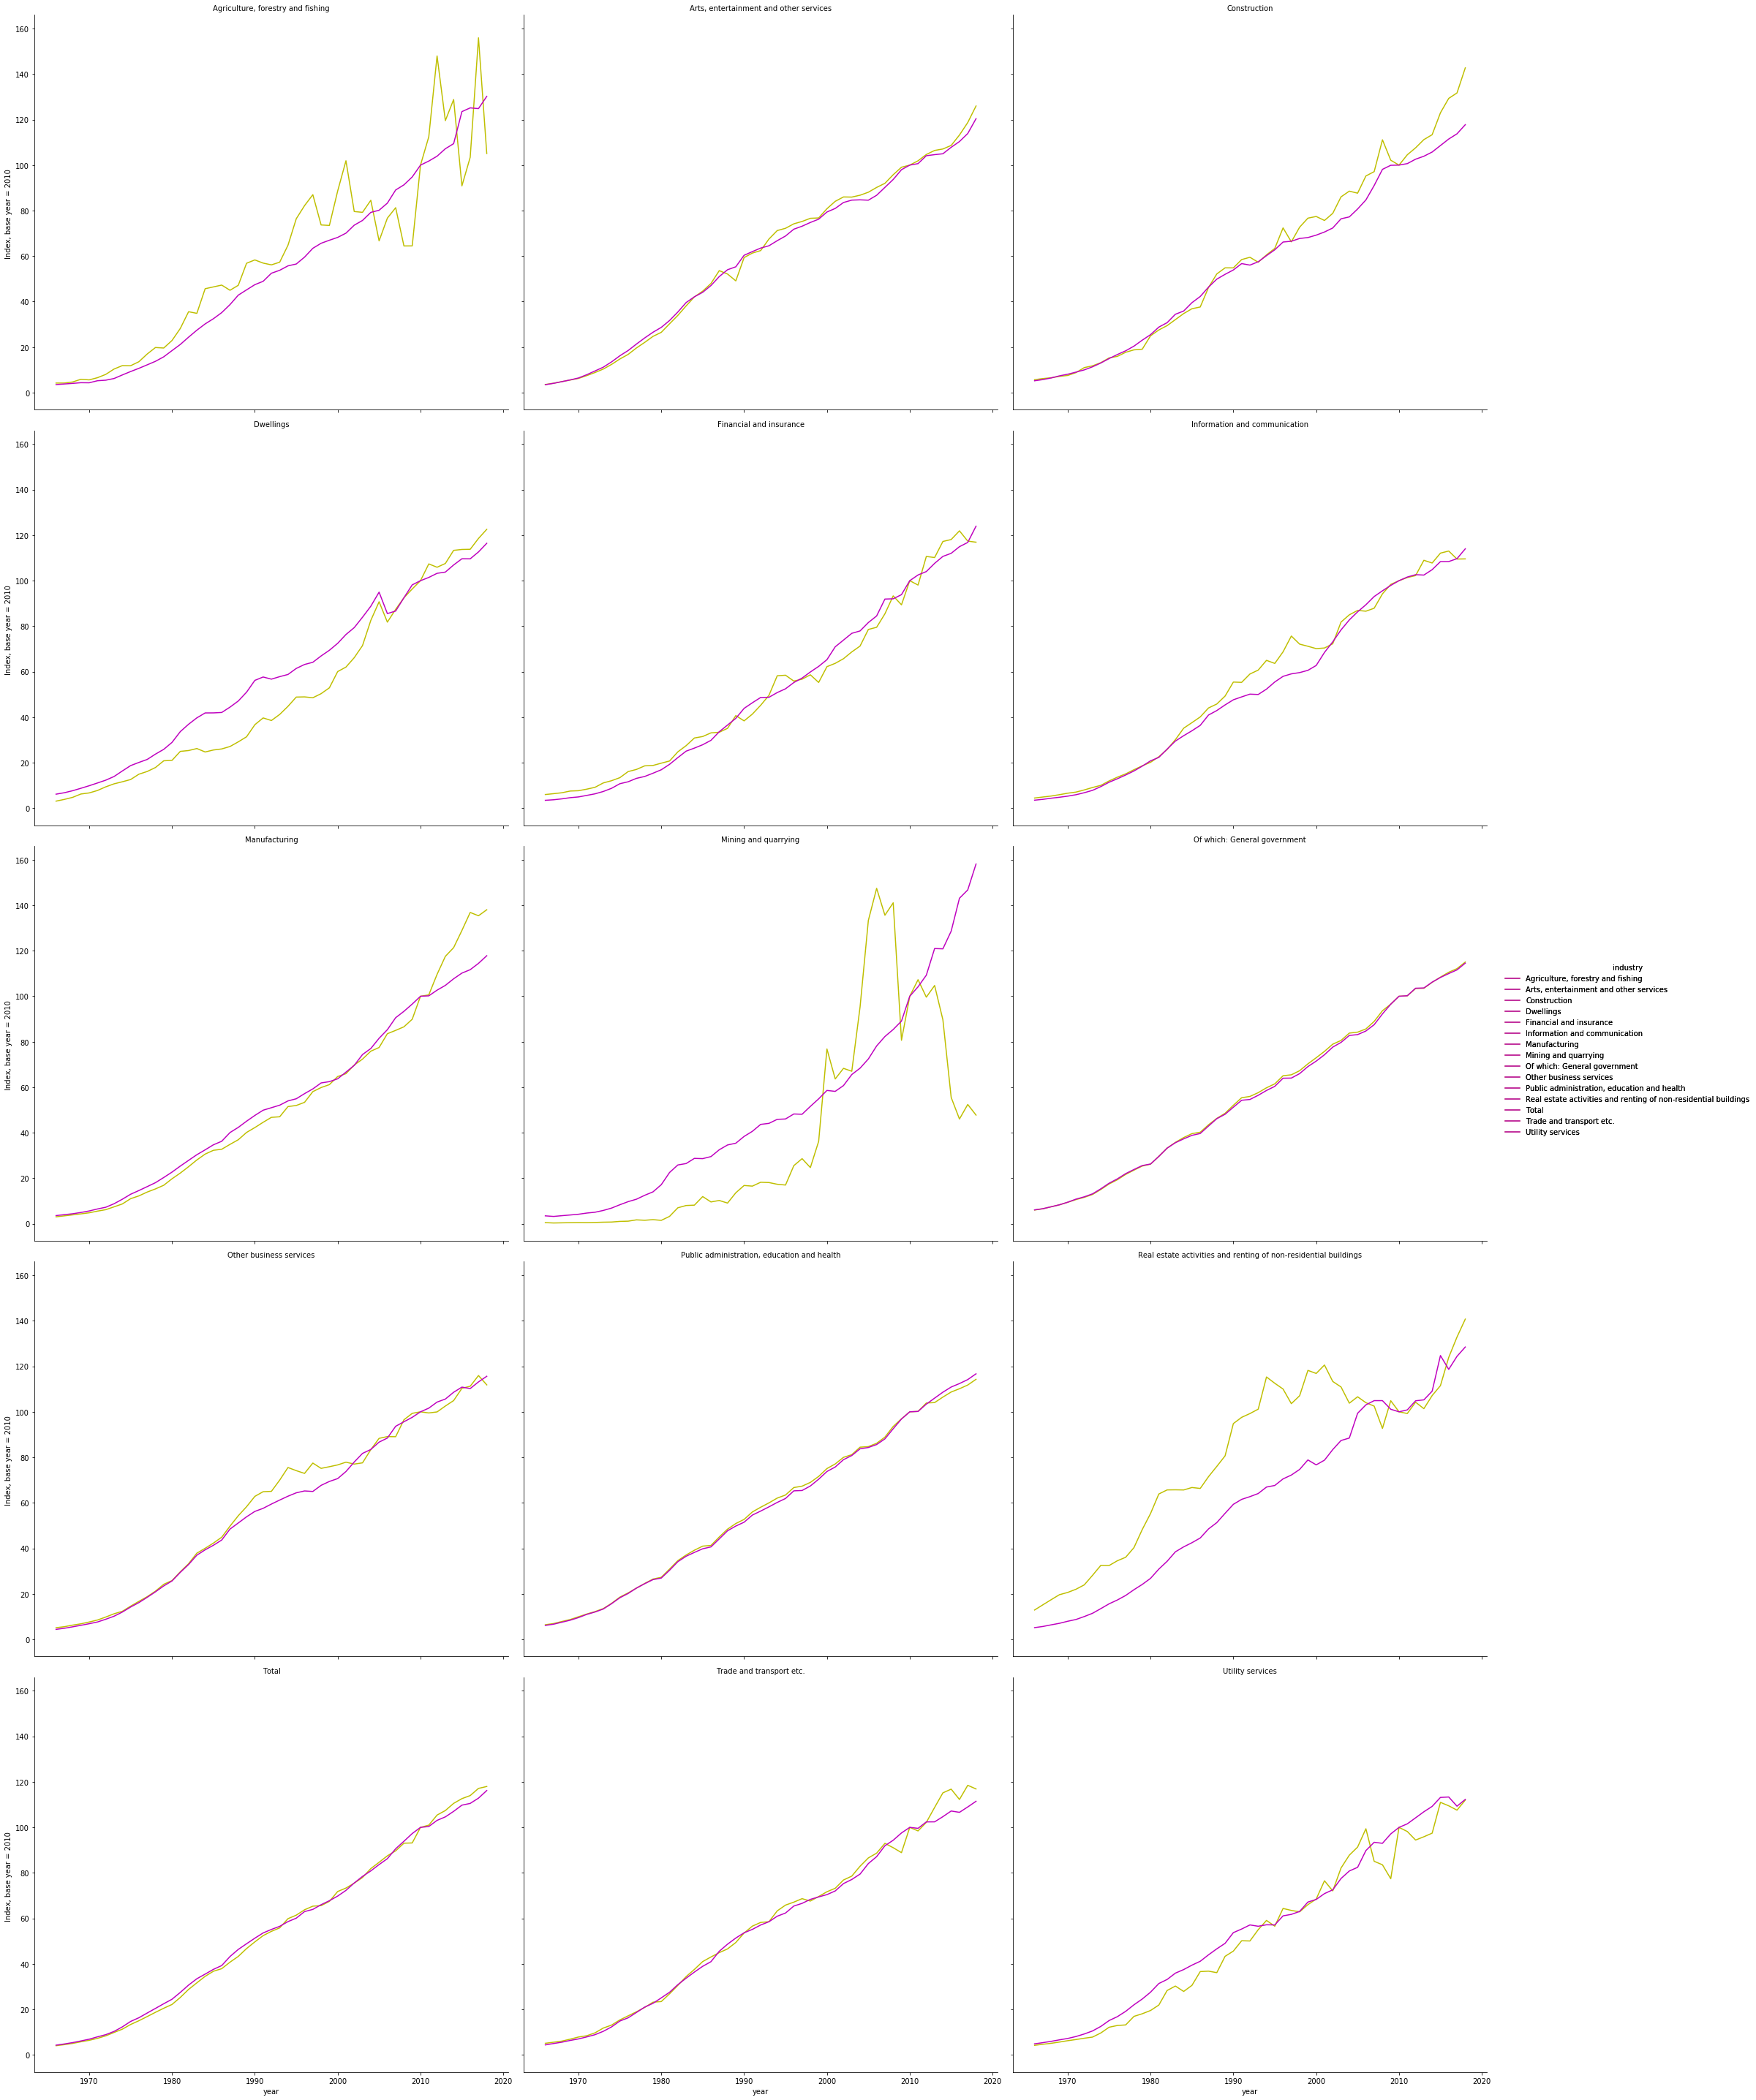

In [197]:
# Forsøg på at lave plot
#df_index.groupby(['industry','year'])['Productivity'].plot(legend=True)
#plt.show()


#fig = plt.figure()
#ax = plt.subplot(111)
#df_index.set_index('year').groupby('industry')['P: indexed=2010'].plot(kind='line', legend=True, ax=ax);
#ax.set_ylabel('Productivity index')
#box = ax.get_position() # find plot coordinates 
#ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9]) # shrink height by 10% at bottom 
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5); # Put a legend below current axis

by_var = 'industry'
y_var  = 'year'

g = sns.FacetGrid(df_index, col=by_var, hue=by_var, col_wrap=3, sharex=True, sharey=True, height=8, aspect=1)
g = (g.map(plt.plot, 'year', 'Pro_index', color='y', ).add_legend()) # draw the upper line 
g = (g.map(plt.plot, 'year', 'H_index', color='m').add_legend()) # draw the upper line 
#g = (g.map(plt.plot, 'year', 'Diff', color='m').add_legend()) # draw the upper line 
g = g.set_titles("{col_name}") # # Control the title of each facet
g = g.set_ylabels('Index, base year = 2010 ')



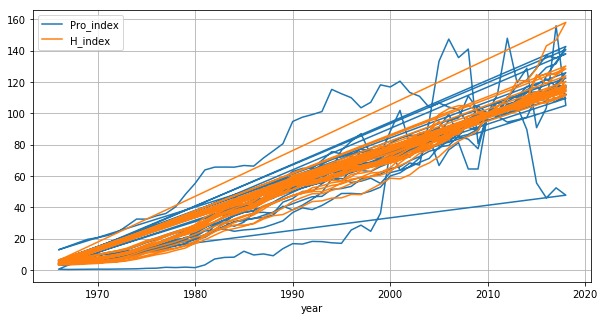

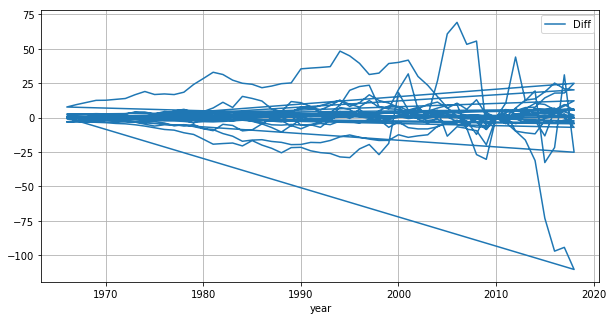

In [199]:
by_var = 'industry'
df_index.plot(x='year', y=['Pro_index', 'H_index'], sort_columns=by_var, figsize=(10,5), grid=True)
df_index.plot(x='year', y=['Diff'], figsize=(10,5), grid=True)

In [157]:
def _plot_timeseries(dataframe, industry, variable, years):
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    dataframe.loc[:,['year']] = pd.to_numeric(dataframe['year'])
    I = (dataframe['year'] >= years[0]) & (dataframe['year'] <= years[1])
    
    x = dataframe.loc[I,'year']
    y = dataframe.loc[I,variable]
    ax.plot(x,y)
    
    ax.set_xticks(list(range(years[0], years[1] + 1, 5)))    
    
def plot_timeseries(dataframe):
    
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(dataframe),
    industry = widgets.Dropdown(
        #index=dataframe['Diff'],
        description='Industry', 
        options= dataframe['industry'].unique(), 
        value='Total'),
    variable = widgets.Dropdown(
        description='variable', 
        options=['Pro_index','H_index','Diff'], 
        value='Pro_index'),
    years=widgets.IntRangeSlider(
        description="years",
        min=1966,
        max=2018,
        value=[1966, 2018],
        continuous_update=False,
    )                 
); 
    
#df['carrier'].unique().tolist()

In [158]:
plot_timeseries(df_index)

interactive(children=(Dropdown(description='Industry', index=12, options=('Agriculture, forestry and fishing',…